# Tesla stock rediction using machine learning as well as Neural Net.


## 1. Problem
Predict the stock of upcomming days.
1. Using Machine learning Regressor 
2 Neural Network

## 2. Data 
The data we are using is from Kaggle Tesla Stock Price:
Link: https://www.kaggle.com/rpaguirre/tesla-stock-price

## 3.Features
Within the dataset one will encounter the following:

1. The date - "Date"
2. The opening price of the stock - "Open"
3. The high price of that day - "High"
4. The low price of that day - "Low"
5. The closed price of that day - "Close"
6. The amount of stocks traded during that day - "Volume"

## Things to do:
* For Machine Learning Regressor:
  1. There are lots of character or objects datatypes, make sure it is converted to numericals values. Using preprocessing from sklearn
  2. Split the data into X and y traning and testing data set.
  3. Create a model.
  4. Train the model
* For Specific Neural Network
  1. There are lots of character or objects datatypes, make sure it is converted to numericals values. Using preprocessing from sklearn
  2. Split the data into X and y traning and testing data set.
  3. Create a keras sequential model.
  4. Add the input and tw hidden layer and a output layer.
  5. Fit the model

In [0]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

###. Load data and some data analysis.

In [4]:
df = pd.read_csv('/content/drive/My Drive/Tesla stock/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.shape

(2416, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Text(0, 0.5, 'Close stock price.')

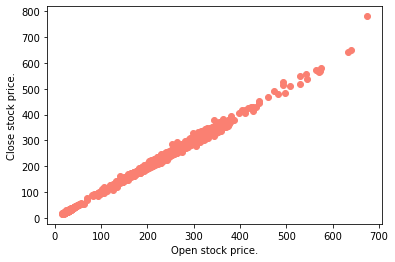

In [7]:
# Plot between the open and close stock price

plt.scatter(df.Open, df.Close, color=['salmon'])
plt.xlabel('Open stock price.')
plt.ylabel('Close stock price.')

From the Graph we can conclude that the stock price of tesla goes in increasing. And Directly depend on the opening price.

In [8]:
from sklearn.preprocessing import LabelEncoder
# Changing date column for the visulization
date = LabelEncoder().fit_transform(list(df['Date']))
date

array([   0,    1,    2, ..., 2413, 2414, 2415])

Text(0, 0.5, '0 - 47065000 \n Volume')

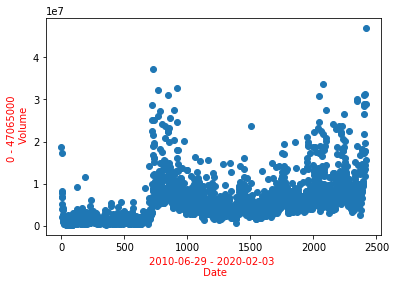

In [9]:
# Visulising the volumn column with the data columns
plt.scatter(date, df.Volume)
plt.xlabel(f"{df.iloc[0].Date} - {df.iloc[2415].Date} \n Date",color='red')
plt.ylabel(f"0 - {df['Volume'].max()} \n Volume", color='red')

In [0]:
 # Split the data into traning and testing 
X = df.drop(['Volume'], axis = 1)
y = df['Volume']

In [11]:
# Chaning the data object to the correponding numerical values using on hot encode.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ['Date']
transformer = ColumnTransformer([('one_hot', 
                                   OneHotEncoder(), 
                                   categorical_feature)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<2416x2421 sparse matrix of type '<class 'numpy.float64'>'
	with 14496 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.model_selection import train_test_split
# Split the data into traning and testing 
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

Now we've got our data split into traning and test sets, it's time to built a machine learning model.

1. Rigde Regressor
2. RandomForestRegressor
3. SVR Regressor
4. Linear Regressor

In [0]:
# Importing the required regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.svm import SVR

In [0]:
# Put the model in a dictornary
models = {'Linear Regression': LinearRegression(),
         'Ridge Regression': Ridge(),
         'SVR': SVR(),
         'RandomForestRegression': RandomForestRegressor(),
          'Lasso': Lasso(alpha=0.1)
         }

In [0]:
# Creating a function to fit the model
np.random.seed(42)
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fit and Evaluate given machine learning models.
  models: Dict values
  """

  # For score
  model_score = {}

  # Loop throught the models
  for name ,model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} done!')
    model_score[name] = model.score(X_test, y_test)
  return model_score

In [54]:
model_score = fit_and_score(models=models, X_train=X_train, X_test=X_test , y_train=y_train, y_test=y_test)

Linear Regression done!
Ridge Regression done!
SVR done!
RandomForestRegression done!
Lasso done!


In [55]:
model_score

{'Lasso': -0.025679009829031155,
 'Linear Regression': 0.6294754128794071,
 'RandomForestRegression': 0.591473315106847,
 'Ridge Regression': 0.6294777761544235,
 'SVR': -0.02079945857059684}

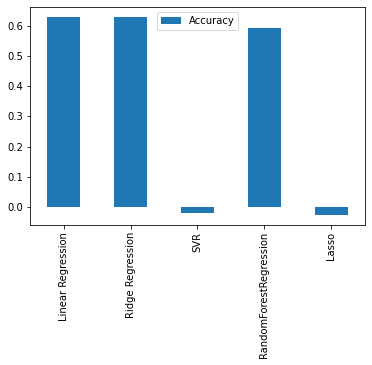

In [56]:
# Model Comprasion
model_compare = pd.DataFrame(model_score, index=['Accuracy'])
model_compare.T.plot.bar();

Here we can see three models are performing well. 
1. Linear Regression
2. Ridge Regression
3. RandomForestRegression


Here we're tuning three of them.

In [71]:
models['Ridge Regression'].get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [0]:
ridge_grid = {
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    "alpha": np.arange(0.01, 10, 0.01)
}

In [73]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

ridge_gd = GridSearchCV(Ridge(),
                        param_grid = ridge_grid,
                        cv=5, 
                        verbose=5)
ridge_gd.fit(X_train, y_train)

Fitting 5 folds for each of 6993 candidates, totalling 34965 fits
[CV] alpha=0.01, solver=auto .........................................
[CV] ............. alpha=0.01, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.01, solver=auto .........................................
[CV] ............. alpha=0.01, solver=auto, score=0.519, total=   0.0s
[CV] alpha=0.01, solver=auto .........................................
[CV] ............. alpha=0.01, solver=auto, score=0.517, total=   0.0s
[CV] alpha=0.01, solver=auto .........................................
[CV] ............. alpha=0.01, solver=auto, score=0.468, total=   0.0s
[CV] alpha=0.01, solver=auto .........................................
[CV] ............. alpha=0.01, solver=auto, score=0.628, total=   0.0s
[CV] alpha=0.01, solver=svd ..........................................
[CV] ................ alpha=0.01, solver=svd, score=nan, total=   0.0s
[CV] alpha=0.01, solver=svd ..........................................
[CV] ......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='svd' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan

[CV] .............. alpha=0.01, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.01, solver=sag ..........................................
[CV] .............. alpha=0.01, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.01, solver=sag ..........................................
[CV] .............. alpha=0.01, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.01, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.01, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.01, solver=saga .........................................
[CV] ............... alpha=0.01, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.01, solver=saga .........................................
[CV] ............... alpha=0.01, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.01, solver=saga .........................................
[CV] ............... alpha=0.01, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.01, solver=saga .........................................
[CV] ............... alpha=0.01, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.01, solver=saga .........................................
[CV] ............... alpha=0.01, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.02, solver=auto .........................................
[CV] ............. alpha=0.02, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.02, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.02, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.02, solver=sag ..........................................
[CV] .............. alpha=0.02, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.02, solver=sag ..........................................
[CV] .............. alpha=0.02, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.02, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.02, solver=sag, score=0.418, total=   0.1s
[CV] alpha=0.02, solver=saga .........................................
[CV] ............... alpha=0.02, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.02, solver=saga .........................................
[CV] ............... alpha=0.02, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.02, solver=saga .........................................
[CV] ............... alpha=0.02, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.02, solver=saga .........................................
[CV] ............... alpha=0.02, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.02, solver=saga .........................................
[CV] ............... alpha=0.02, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.03, solver=auto .........................................
[CV] ............. alpha=0.03, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.03, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.03, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.03, solver=sag ..........................................
[CV] .............. alpha=0.03, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.03, solver=sag ..........................................
[CV] .............. alpha=0.03, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.03, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.03, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.03, solver=saga .........................................
[CV] ............... alpha=0.03, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.03, solver=saga .........................................
[CV] ............... alpha=0.03, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.03, solver=saga .........................................
[CV] ............... alpha=0.03, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.03, solver=saga .........................................
[CV] ............... alpha=0.03, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.03, solver=saga .........................................
[CV] ............... alpha=0.03, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.04, solver=auto .........................................
[CV] ............. alpha=0.04, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.04, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.04, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.04, solver=sag ..........................................
[CV] .............. alpha=0.04, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.04, solver=sag ..........................................
[CV] .............. alpha=0.04, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.04, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.04, solver=sag, score=0.418, total=   0.1s
[CV] alpha=0.04, solver=saga .........................................
[CV] ............... alpha=0.04, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.04, solver=saga .........................................
[CV] ............... alpha=0.04, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.04, solver=saga .........................................
[CV] ............... alpha=0.04, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.04, solver=saga .........................................
[CV] ............... alpha=0.04, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.04, solver=saga .........................................
[CV] ............... alpha=0.04, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.05, solver=auto .........................................
[CV] ............. alpha=0.05, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.05, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.05, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.05, solver=sag ..........................................
[CV] .............. alpha=0.05, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.05, solver=sag ..........................................
[CV] .............. alpha=0.05, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.05, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.05, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.05, solver=saga .........................................
[CV] ............... alpha=0.05, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.05, solver=saga .........................................
[CV] ............... alpha=0.05, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.05, solver=saga .........................................
[CV] ............... alpha=0.05, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.05, solver=saga .........................................
[CV] ............... alpha=0.05, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.05, solver=saga .........................................
[CV] ............... alpha=0.05, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.060000000000000005, solver=auto .........................
[CV]  alpha=0.060000000000000005, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.060000000000000005, solver=auto .........................
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV]  alpha=0.060000000000000005, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.060000000000000005, solver=sag ..........................
[CV]  alpha=0.060000000000000005, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.060000000000000005, solver=sag ..........................
[CV]  alpha=0.060000000000000005, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.060000000000000005, solver=sag ..........................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV]  alpha=0.060000000000000005, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.060000000000000005, solver=saga .........................
[CV]  alpha=0.060000000000000005, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.060000000000000005, solver=saga .........................
[CV]  alpha=0.060000000000000005, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.060000000000000005, solver=saga .........................
[CV]  alpha=0.060000000000000005, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.060000000000000005, solver=saga .........................
[CV]  alpha=0.060000000000000005, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.060000000000000005, solver=saga .........................
[CV]  alpha=0.060000000000000005, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.06999999999999999, solver=auto ..........................
[CV]  alpha=0.06999999999999999, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.06999999999999999, solver=auto ........................

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV]  alpha=0.06999999999999999, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.06999999999999999, solver=sag ...........................
[CV]  alpha=0.06999999999999999, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.06999999999999999, solver=sag ...........................
[CV]  alpha=0.06999999999999999, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.06999999999999999, solver=sag ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV]  alpha=0.06999999999999999, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.06999999999999999, solver=saga ..........................
[CV]  alpha=0.06999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.06999999999999999, solver=saga ..........................
[CV]  alpha=0.06999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.06999999999999999, solver=saga ..........................
[CV]  alpha=0.06999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.06999999999999999, solver=saga ..........................
[CV]  alpha=0.06999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.06999999999999999, solver=saga ..........................
[CV]  alpha=0.06999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.08, solver=auto .........................................
[CV] ............. alpha=0.08, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.08, solver=auto .........................................
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.08, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.08, solver=sag ..........................................
[CV] .............. alpha=0.08, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.08, solver=sag ..........................................
[CV] .............. alpha=0.08, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.08, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.08, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.08, solver=saga .........................................
[CV] ............... alpha=0.08, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.08, solver=saga .........................................
[CV] ............... alpha=0.08, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.08, solver=saga .........................................
[CV] ............... alpha=0.08, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.08, solver=saga .........................................
[CV] ............... alpha=0.08, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.08, solver=saga .........................................
[CV] ............... alpha=0.08, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09, solver=auto .........................................
[CV] ............. alpha=0.09, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.09, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.09, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.09, solver=sag ..........................................
[CV] .............. alpha=0.09, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.09, solver=sag ..........................................
[CV] .............. alpha=0.09, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.09, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.09, solver=sag, score=0.418, total=   0.1s
[CV] alpha=0.09, solver=saga .........................................
[CV] ............... alpha=0.09, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09, solver=saga .........................................
[CV] ............... alpha=0.09, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09, solver=saga .........................................
[CV] ............... alpha=0.09, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09, solver=saga .........................................
[CV] ............... alpha=0.09, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09, solver=saga .........................................
[CV] ............... alpha=0.09, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09999999999999999, solver=auto ..........................
[CV]  alpha=0.09999999999999999, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.09999999999999999, solver=auto ..........................
[CV]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV]  alpha=0.09999999999999999, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.09999999999999999, solver=sag ...........................
[CV]  alpha=0.09999999999999999, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.09999999999999999, solver=sag ...........................
[CV]  alpha=0.09999999999999999, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.09999999999999999, solver=sag ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV]  alpha=0.09999999999999999, solver=sag, score=0.418, total=   0.1s
[CV] alpha=0.09999999999999999, solver=saga ..........................
[CV]  alpha=0.09999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09999999999999999, solver=saga ..........................
[CV]  alpha=0.09999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09999999999999999, solver=saga ..........................
[CV]  alpha=0.09999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09999999999999999, solver=saga ..........................
[CV]  alpha=0.09999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.09999999999999999, solver=saga ..........................
[CV]  alpha=0.09999999999999999, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.11, solver=auto .........................................
[CV] ............. alpha=0.11, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.11, solver=auto .........................................
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.11, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.11, solver=sag ..........................................
[CV] .............. alpha=0.11, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.11, solver=sag ..........................................
[CV] .............. alpha=0.11, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.11, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.11, solver=sag, score=0.418, total=   0.1s
[CV] alpha=0.11, solver=saga .........................................
[CV] ............... alpha=0.11, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.11, solver=saga .........................................
[CV] ............... alpha=0.11, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.11, solver=saga .........................................
[CV] ............... alpha=0.11, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.11, solver=saga .........................................
[CV] ............... alpha=0.11, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.11, solver=saga .........................................
[CV] ............... alpha=0.11, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.12, solver=auto .........................................
[CV] ............. alpha=0.12, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.12, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.12, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.12, solver=sag ..........................................
[CV] .............. alpha=0.12, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.12, solver=sag ..........................................
[CV] .............. alpha=0.12, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.12, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.12, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.12, solver=saga .........................................
[CV] ............... alpha=0.12, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.12, solver=saga .........................................
[CV] ............... alpha=0.12, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.12, solver=saga .........................................
[CV] ............... alpha=0.12, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.12, solver=saga .........................................
[CV] ............... alpha=0.12, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.12, solver=saga .........................................
[CV] ............... alpha=0.12, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.13, solver=auto .........................................
[CV] ............. alpha=0.13, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.13, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.13, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.13, solver=sag ..........................................
[CV] .............. alpha=0.13, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.13, solver=sag ..........................................
[CV] .............. alpha=0.13, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.13, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.13, solver=sag, score=0.418, total=   0.1s
[CV] alpha=0.13, solver=saga .........................................
[CV] ............... alpha=0.13, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.13, solver=saga .........................................
[CV] ............... alpha=0.13, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.13, solver=saga .........................................
[CV] ............... alpha=0.13, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.13, solver=saga .........................................
[CV] ............... alpha=0.13, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.13, solver=saga .........................................
[CV] ............... alpha=0.13, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.14, solver=auto .........................................
[CV] ............. alpha=0.14, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.14, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.14, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.14, solver=sag ..........................................
[CV] .............. alpha=0.14, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.14, solver=sag ..........................................
[CV] .............. alpha=0.14, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.14, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.14, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.14, solver=saga .........................................
[CV] ............... alpha=0.14, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.14, solver=saga .........................................
[CV] ............... alpha=0.14, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.14, solver=saga .........................................
[CV] ............... alpha=0.14, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.14, solver=saga .........................................
[CV] ............... alpha=0.14, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.14, solver=saga .........................................
[CV] ............... alpha=0.14, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.15000000000000002, solver=auto ..........................
[CV]  alpha=0.15000000000000002, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.15000000000000002, solver=auto ..........................
[CV]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV]  alpha=0.15000000000000002, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.15000000000000002, solver=sag ...........................
[CV]  alpha=0.15000000000000002, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.15000000000000002, solver=sag ...........................
[CV]  alpha=0.15000000000000002, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.15000000000000002, solver=sag ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV]  alpha=0.15000000000000002, solver=sag, score=0.418, total=   0.1s
[CV] alpha=0.15000000000000002, solver=saga ..........................
[CV]  alpha=0.15000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.15000000000000002, solver=saga ..........................
[CV]  alpha=0.15000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.15000000000000002, solver=saga ..........................
[CV]  alpha=0.15000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.15000000000000002, solver=saga ..........................
[CV]  alpha=0.15000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.15000000000000002, solver=saga ..........................
[CV]  alpha=0.15000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.16, solver=auto .........................................
[CV] ............. alpha=0.16, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.16, solver=auto .........................................
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.16, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.16, solver=sag ..........................................
[CV] .............. alpha=0.16, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.16, solver=sag ..........................................
[CV] .............. alpha=0.16, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.16, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.16, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.16, solver=saga .........................................
[CV] ............... alpha=0.16, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.16, solver=saga .........................................
[CV] ............... alpha=0.16, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.16, solver=saga .........................................
[CV] ............... alpha=0.16, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.16, solver=saga .........................................
[CV] ............... alpha=0.16, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.16, solver=saga .........................................
[CV] ............... alpha=0.16, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.17, solver=auto .........................................
[CV] ............. alpha=0.17, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.17, solver=auto .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.17, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.17, solver=sag ..........................................
[CV] .............. alpha=0.17, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.17, solver=sag ..........................................
[CV] .............. alpha=0.17, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.17, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.17, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.17, solver=saga .........................................
[CV] ............... alpha=0.17, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.17, solver=saga .........................................
[CV] ............... alpha=0.17, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.17, solver=saga .........................................
[CV] ............... alpha=0.17, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.17, solver=saga .........................................
[CV] ............... alpha=0.17, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.17, solver=saga .........................................
[CV] ............... alpha=0.17, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.18000000000000002, solver=auto ..........................
[CV]  alpha=0.18000000000000002, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.18000000000000002, solver=auto ..........................
[CV]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV]  alpha=0.18000000000000002, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.18000000000000002, solver=sag ...........................
[CV]  alpha=0.18000000000000002, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.18000000000000002, solver=sag ...........................
[CV]  alpha=0.18000000000000002, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.18000000000000002, solver=sag ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV]  alpha=0.18000000000000002, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.18000000000000002, solver=saga ..........................
[CV]  alpha=0.18000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.18000000000000002, solver=saga ..........................
[CV]  alpha=0.18000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.18000000000000002, solver=saga ..........................
[CV]  alpha=0.18000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.18000000000000002, solver=saga ..........................
[CV]  alpha=0.18000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.18000000000000002, solver=saga ..........................
[CV]  alpha=0.18000000000000002, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.19, solver=auto .........................................
[CV] ............. alpha=0.19, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.19, solver=auto .........................................
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] .............. alpha=0.19, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.19, solver=sag ..........................................
[CV] .............. alpha=0.19, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.19, solver=sag ..........................................
[CV] .............. alpha=0.19, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.19, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] .............. alpha=0.19, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.19, solver=saga .........................................
[CV] ............... alpha=0.19, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.19, solver=saga .........................................
[CV] ............... alpha=0.19, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.19, solver=saga .........................................
[CV] ............... alpha=0.19, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.19, solver=saga .........................................
[CV] ............... alpha=0.19, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.19, solver=saga .........................................
[CV] ............... alpha=0.19, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.2, solver=auto ..........................................
[CV] .............. alpha=0.2, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.2, solver=auto ..........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV] ............... alpha=0.2, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.2, solver=sag ...........................................
[CV] ............... alpha=0.2, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.2, solver=sag ...........................................
[CV] ............... alpha=0.2, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.2, solver=sag ...........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


[CV] ............... alpha=0.2, solver=sag, score=0.419, total=   0.1s
[CV] alpha=0.2, solver=saga ..........................................
[CV] ................ alpha=0.2, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.2, solver=saga ..........................................
[CV] ................ alpha=0.2, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.2, solver=saga ..........................................
[CV] ................ alpha=0.2, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.2, solver=saga ..........................................
[CV] ................ alpha=0.2, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.2, solver=saga ..........................................
[CV] ................ alpha=0.2, solver=saga, score=nan, total=   0.0s
[CV] alpha=0.21000000000000002, solver=auto ..........................
[CV]  alpha=0.21000000000000002, solver=auto, score=0.518, total=   0.0s
[CV] alpha=0.21000000000000002, solver=auto ..........................
[CV]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: solver='saga' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

[CV]  alpha=0.21000000000000002, solver=sag, score=0.451, total=   0.1s
[CV] alpha=0.21000000000000002, solver=sag ...........................
[CV]  alpha=0.21000000000000002, solver=sag, score=0.317, total=   0.1s
[CV] alpha=0.21000000000000002, solver=sag ...........................
[CV]  alpha=0.21000000000000002, solver=sag, score=0.309, total=   0.1s
[CV] alpha=0.21000000000000002, solver=sag ...........................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


KeyboardInterrupt: ignored

In [0]:
ridge_gd.best_params_

In [0]:
ridge_gd.score(X_test, y_test)